In [ ]:
!pip install fal-client

In [1]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY

True

In [3]:
import nest_asyncio
nest_asyncio.apply()

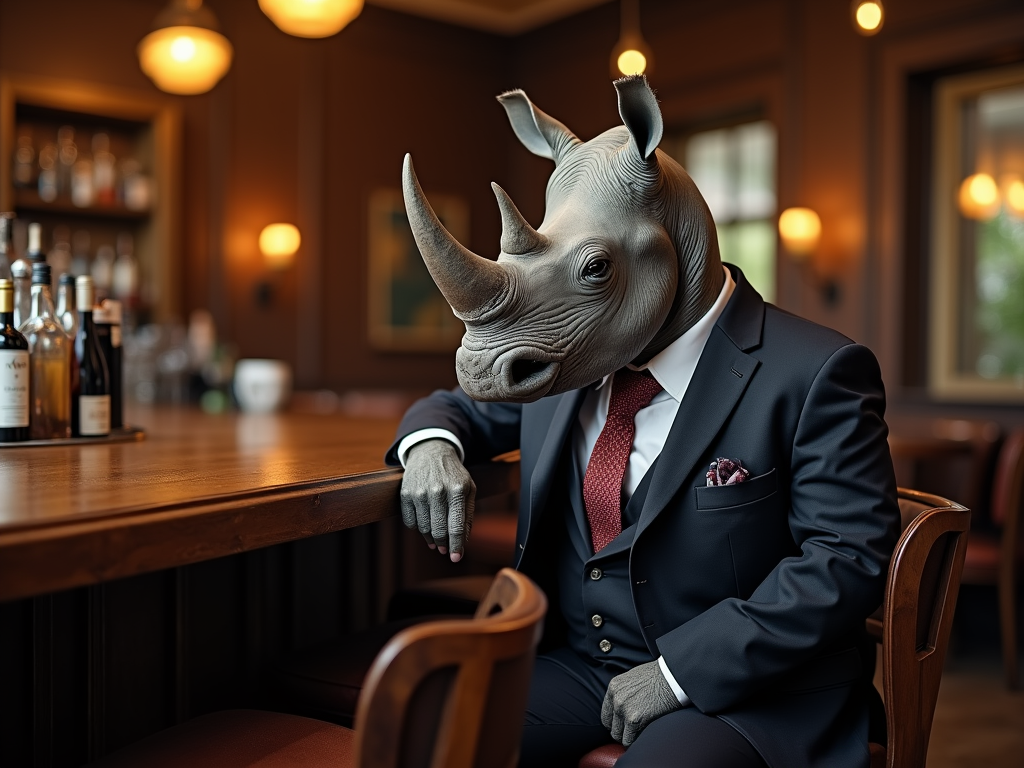

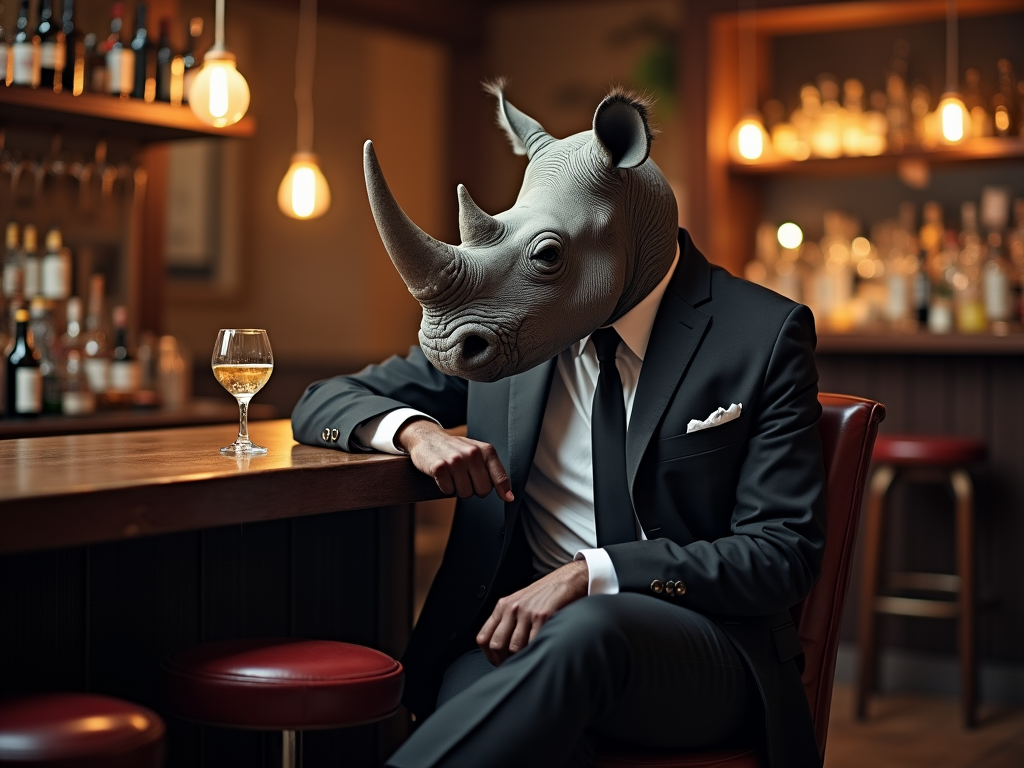

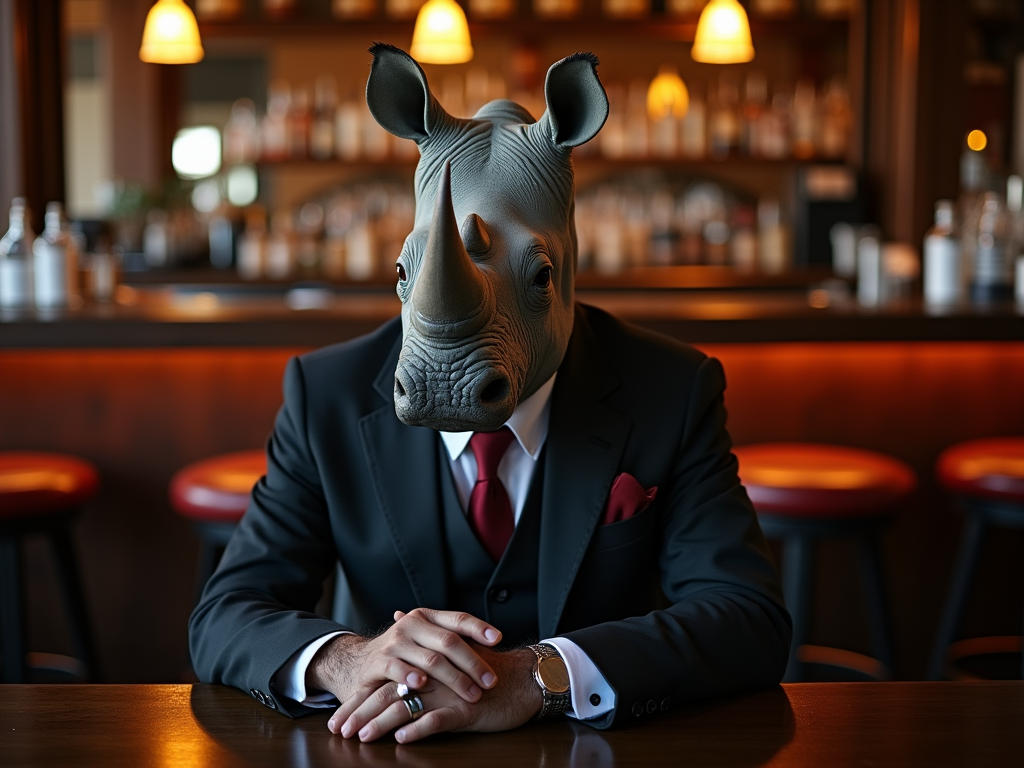

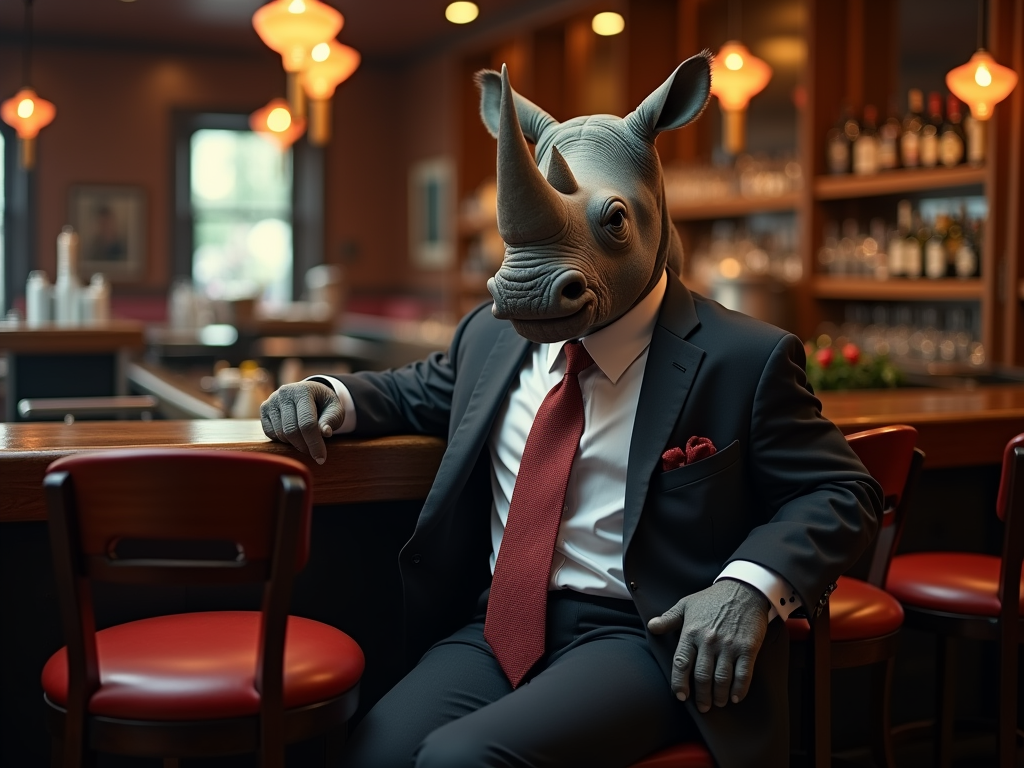

In [8]:
import asyncio
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import os

async def submit(model: str, prompt: str):
    # Submit 4 requests in parallel
    handlers = await asyncio.gather(*[
        fal_client.submit_async(
            model,
            arguments={
                "prompt": prompt
            },
        ) for _ in range(4)
    ])

    # Get all results in parallel
    results = await asyncio.gather(*[
        fal_client.result_async(model, handler.request_id) 
        for handler in handlers
    ])

    # Display all images
    for result in results:
        image_url = result['images'][0]['url']
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        display(img)

# Model and prompt configuration
model = "fal-ai/flux/dev"
prompt = "photo of a rhino dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography, Elke vogelsang"

asyncio.run(submit(model, prompt))